# ft_linear_regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Normalizer import Normalizer

## Training

### Get the data

In [2]:
data = pd.read_csv('data.csv')
data.describe()

,km,price
count,24.000000,24.000000
mean,101066.250000,6331.833333
std,52674.245606,1319.654193
min,22899.000000,3650.000000
25%,65020.500000,5687.500000
50%,83014.500000,6495.000000
75%,140975.000000,7115.000000
max,240000.000000,8290.000000


In [3]:
data

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250
5,114800,5350
6,166800,5800
7,89000,5990
8,144500,5999
9,84000,6200


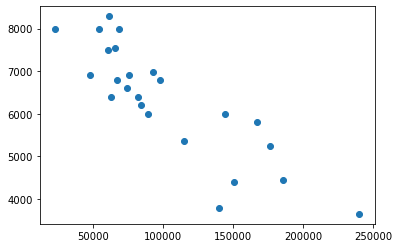

In [4]:
plt.scatter(data['km'], data['price'])

### Normalization (Min-Max Scalar)

Using the Normalizer in Normalize.py

In [5]:
norm = Normalizer('data.csv')

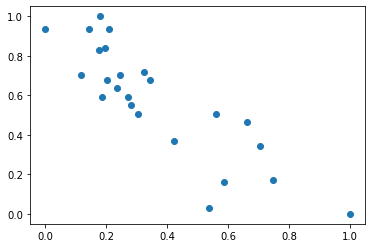

In [6]:
x = norm.normalize_km_list(data['km'])
y = norm.normalize_price_list(data['price'])
plt.scatter(x, y)

### Predict function 
f(x) = ax + b

In [7]:
def f(theta, km):
    return theta[0] + (theta[1] * km)

### j(a, b) Mean squared error

In [8]:
def j(theta, km, price):
    sum0 = 0
    sum1 = 0
    m = len(km)
    for i in range(m):
        sum0 += f(theta, km[i]) - price[i]
        sum1 += (f(theta, km[i]) - price[i]) * km[i]
    return [(1 / m) * sum0, (1 / m) * sum1]

### Gradient descent

In [9]:
def gradient_descent(theta, km, price):
    learning_rate = 0.1
    history = []

    for i in range(1000):
        d_theta = j(theta, km, price)
        theta[0] -= (learning_rate * (d_theta[0]))
        theta[1] -= (learning_rate * (d_theta[1]))
        history.append([theta[0], theta[1]])
    return theta, history

### Run training

In [10]:
theta = [0, 0]
theta, history = gradient_descent(theta, x, y)
print(theta)

[0.9362124793084768, -0.9953762249792935]


We can visualize the gradient descent

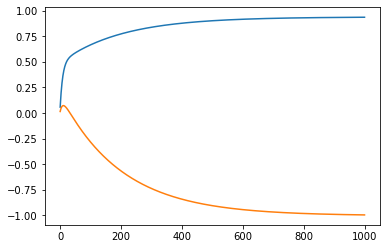

In [11]:
plt.plot(range(1000), history)

### Printing the regression

In [12]:
def print_model(x, y, theta):
    line_x = [min(x), max(x)]
    line_y = [f(theta, i) for i in line_x]
    plt.xlabel('km')
    plt.ylabel('price')
    plt.plot(x, y, 'ro')
    plt.plot(line_x, line_y, 'b')
    plt.show()

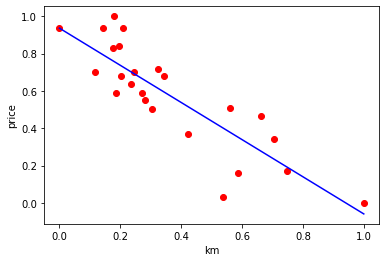

In [13]:
print_model(x, y, theta)

## Predict - with our theta

In [14]:
theta = theta
km = 60000

In [15]:
km = norm.normalize_km(km)
result = f(theta, km)
result = norm.denormalize_price(result)
round(result, 2)

7204.75

### Verify the precision of our prediction
Coefficient of Determination or R2 - score

In [16]:
preds = []
for val in data['km']:
    val = norm.normalize_km(val)
    result = f(theta, val)
    result = norm.denormalize_price(result)
    preds.append(result)
preds

[3375.480220087411,
 5507.106870941958,
 5279.478076888628,
 4534.2596978523525,
 4736.998240593309,
 6038.949847702073,
 4932.716456041032,
 6587.8117997185145,
 5407.120391311056,
 6694.180395070538,
 6736.110895358305,
 7139.652072404811,
 6906.917585774584,
 6406.985187620075,
 7055.833619267416,
 6863.838304657014,
 7455.03495762356,
 6502.716923436896,
 7184.560893362435,
 7084.042570754773,
 7332.391967182677,
 7023.92304066181,
 7994.025903991333,
 7166.690969343295]

In [17]:
def r2_score(y, values):
    u = 0
    for i in ((y - values) ** 2):
        u += i
    v = 0
    for i in ((y - y.mean()) **2):
        v += i
    return 1 - u / v

In [18]:
r2_score(data['price'], preds)

0.7329254721645162